In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import copy

# Define dataset to plot here

In [2]:
datasetfile_path = "/home/mayank/Videos/single-ring-road-with-light/SingleLaneIDM/LocalView10Comm10/Results/dataset.pkl"

# Load dataset in memory

In [3]:
with open(datasetfile_path, "rb") as handle:
    data_dict = pickle.load(handle)

# Dataset Attributes

In [4]:
num_episodes = data_dict["num_episodes"]
episode_length = data_dict["episode-length"]
time_period = data_dict["time-period"]

# Agent Speed as the function of time

In [5]:
global_vel_data = {}

for density in data_dict["data"].keys():
    
    vel_data = np.zeros((num_episodes, episode_length))
    
    for episode_num in data_dict["data"][density]:
        
            for step in range(0, episode_length):
                
                vel_data[episode_num][step] = data_dict["data"][density][episode_num]["agent_vel"][step]
    
    global_vel_data[density] = vel_data.copy()


Text(0, 0.5, 'agent speed, (km/hr)')

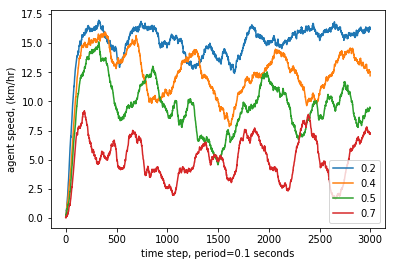

In [6]:
for density in global_vel_data.keys():
    plt.plot(global_vel_data[density].mean(axis=0) * 3.6, label=density)
plt.legend()
plt.xlabel("time step, period=%.1f seconds"%(time_period))
plt.ylabel("agent speed, (km/hr)")

In [36]:
densities

[0.2, 0.4, 0.5, 0.7]

agent is moving at speed much greater than allowed by local view. However, due to pertubation is adapts its velocity.

# Average Speed as the function of densities

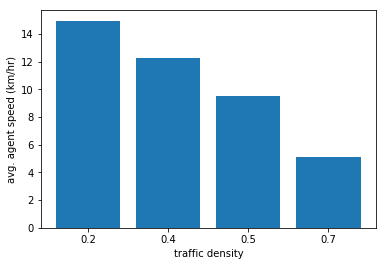

In [7]:
avg_speeds = []
densities = []

for density in global_vel_data.keys():
    densities.append(density)
    avg_speeds.append(global_vel_data[density].mean() * 3.6)

plt.bar(np.arange(len(densities)), avg_speeds)
plt.xticks(np.arange(len(densities)), densities)

plt.xlabel("traffic density")
plt.ylabel("avg. agent speed (km/hr)")
plt.show()

# Average Reward

In [22]:
avg_rewards = []
densities = []

for density in data_dict["data"].keys():
    densities.append(density)
    
    cum_reward_sum = 0.0
    for episode_num in data_dict["data"][density]:
                cum_reward_sum += data_dict["data"][density][episode_num]["cum_reward"]
    
    avg_rewards.append(cum_reward_sum/num_episodes)

Text(0, 0.5, 'avg. reward')

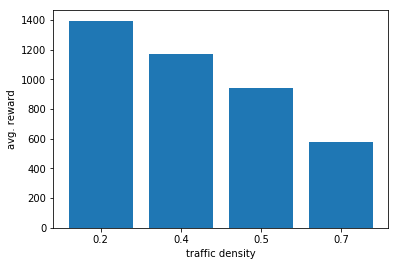

In [23]:
plt.bar(np.arange(len(densities)), avg_rewards)
plt.xticks(np.arange(len(densities)), densities)
plt.xlabel("traffic density")
plt.ylabel("avg. reward")

# Action Distribution

In [24]:
possible_actions = {}
for element in set(data_dict["data"][0.2][0]["planner_actions"]):
    possible_actions[element] = 0

action_distribution = {}
for density in data_dict["data"].keys():
    action_distribution[density] = copy.deepcopy(possible_actions)
    
    for episode_num in data_dict["data"][density]:
        for step in range(0, episode_length):
            action_distribution[density][data_dict["data"][density][episode_num]["planner_actions"][step]] += 1

In [25]:
action_distribution

{0.2: {'do-nothing': 18414, 'acc': 28886, 'dec': 12700},
 0.4: {'do-nothing': 18999, 'acc': 27161, 'dec': 13840},
 0.5: {'do-nothing': 19026, 'acc': 25978, 'dec': 14996},
 0.7: {'do-nothing': 21033, 'acc': 22141, 'dec': 16826}}

In [26]:
for density in action_distribution.keys():
    
    total = 0
    for act in action_distribution[density].keys():
        total += action_distribution[density][act]
    
    assert total == (num_episodes * episode_length)

for density in action_distribution.keys():
    for action in action_distribution[density].keys():
        action_distribution[density][action] /= (num_episodes * episode_length)

In [27]:
plots = []
order = []

for action in action_distribution[0.2].keys():
    act_list = []
    order.append(action)
    for density in action_distribution.keys():
        act_list.append(action_distribution[density][action])
    
    plots.append(act_list)
    

In [28]:
order

['do-nothing', 'acc', 'dec']

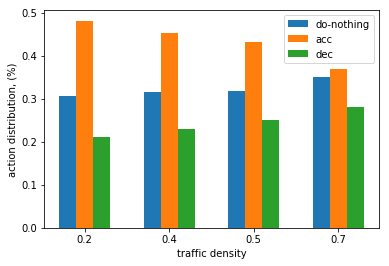

In [29]:
width = - 0.2

plt.bar(np.arange(len(densities)) - 0.2, plots[0], width=width, label=order[0])
plt.bar(np.arange(len(densities)), plots[1], width=width, label=order[1])
plt.bar(np.arange(len(densities)) + 0.2, plots[2], width=width, label=order[2])
plt.xticks(np.arange(len(densities)), densities)
plt.xlabel("traffic density")
plt.ylabel("action distribution, (%)")
plt.legend()
plt.show()

# Comm Actions Distribution

In [30]:
possible_regs = {}
for element in set(data_dict["data"][0.2][0]["comm_actions"]):
    possible_regs[element] = 0

regs_distribution = {}
for density in data_dict["data"].keys():
    regs_distribution[density] = copy.deepcopy(possible_regs)
    
    for episode_num in data_dict["data"][density]:
        for step in range(0, episode_length):
            regs_distribution[density][data_dict["data"][density][episode_num]["comm_actions"][step]] += 1

In [31]:
regs_distribution

{0.2: {'NULL': 2120, 'reg_0': 847, 'reg_1': 57033},
 0.4: {'NULL': 7385, 'reg_0': 2594, 'reg_1': 50021},
 0.5: {'NULL': 12873, 'reg_0': 5996, 'reg_1': 41131},
 0.7: {'NULL': 21576, 'reg_0': 10064, 'reg_1': 28360}}

In [32]:
for density in regs_distribution.keys():
    
    total = 0
    for act in regs_distribution[density].keys():
        total += regs_distribution[density][act]
    
    assert total == (num_episodes * episode_length)

for density in regs_distribution.keys():
    for action in regs_distribution[density].keys():
        regs_distribution[density][action] /= (num_episodes * episode_length)

In [33]:
plots = []
order = []

for action in regs_distribution[0.2].keys():
    act_list = []
    order.append(action)
    for density in regs_distribution.keys():
        act_list.append(regs_distribution[density][action])
    
    plots.append(act_list)

In [34]:
order

['NULL', 'reg_0', 'reg_1']

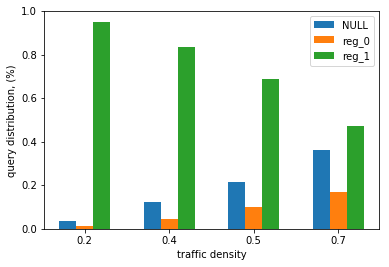

In [35]:
width = 0.2

plt.bar(np.arange(len(densities)) - 0.2, plots[0], width=width, label=order[0])
plt.bar(np.arange(len(densities)), plots[1], width=width, label=order[1])
plt.bar(np.arange(len(densities)) + 0.2, plots[2], width=width, label=order[2])
plt.xticks(np.arange(len(densities)), densities)
plt.xlabel("traffic density")
plt.ylabel("query distribution, (%)")
plt.legend()
plt.show()

# Perception of vehicle

<img align="left" src="ITSC2019.png">